World Gender Values: 
-
How pov's regarding women reflect in laws/legislations/violence/crime?
====

In [124]:
!pip install pandas
!pip install pyreadstat
!pip install numpy
!pip install scipy
!pip install matplotlib
!pip install seaborn

   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.6 kB 326.8 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.6 kB 581.0 kB/s eta 0:00:01
   ------------------------- ------------ 194.6/294.6 kB 980.4 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.6 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 1.1 MB/s eta 0:00:00


In [1]:
#Libary
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load wsv data
dfWVS = pd.read_spss("..//data//WVS_trends_3_0.sav")  

Gender related questions since WVS3:
- C001 "Jobs scarce: Men should have more right to a job than women (3 categories)" 
- D057 "Being a housewife just as fulfilling" 
- D059 "Men make better political leaders than women do" 
- D060 "University is more important for a boy than for a girl" 
- E069_15 "Confidence: The Women´s Movement"

Indirect related questions since wvs3:
- D054 "One of main goals in life has been to make my parents proud"
- F063 "How important is God in your life"
- F119 "Justifiable: Prostitution"
- F120 "Justifiable: Abortion"
- F121 "Justifiable: Divorce"
- E035 "Income equality" (where sex is female)
- A173 "How much freedom of choice and control" (where sex is female)
- A003 "Important in life: Leisure time" (gap in sex)
- A008 "Feeling of happiness" (gap in sex)

Demographic questions since wvs3:
- G016	Language at home
- X001	Sex
- X002	Year of birth
- X003	Age
- X007	Marital status
- X011	How many children do you have
- X025CSWVS	Education (country specific) WVS
- X028	Employment status
- X040	Are you the chief wage earner in your house
- X044	Family savings during past year
- X045	Social class (subjective)
- X047_WVS	Subjective income level (10 categories) (WVS)
- X047R_WVS	Income level (3 categories) WVS
- X048ISO	Region where the interview was conducted (ISO)
- X048WVS	Region where the interview was conducted (WVS)
- X049	Size of town (8 categories)
- X049a	Size of town where interview was conducted (5 categories)
- X051	Ethnic group

Observed countrie codes:
- Germany(not wvs4)
- China
- Turkey/Pakistan(not 5)/Iran(since wvs4, not 6)
- South Africa(not 7)/Nigeria(not 5)
- Brazil(not wvs4)/Peru

Waves (S002/versn_w):
- '2017-2022'/'WVS7'
- '2010-2014'/'WVS6'
- '2005-2009'/'WVS5'
- '1999-2004'/'WVS4'
- '1994-1998'/'WVS3'
- '1989-1993'/'WVS2'
- '1981-1984'/'WVS1'



In [5]:
#examples filtering
listCountries = ['Germany','China','Turkey','Nigeria','Peru']
listWaves = ['WVS3','WVS5','WVS6','WVS7']

dfWVSFilterd = dfWVS[(dfWVS.versn_w.isin(listWaves)) & (dfWVS.S003.isin(listCountries))]

listGenderQuestions = ['C001', 'D059', 'D060', 'E069_15', 'F120', 'F121', 'E035', 'A173']
listDemographicQuestions = ['X001', 'X003', 'X051', 'X007', 'X040', 'X049']
listIDColummns = ['versn_w', 'S002', 'S003', 'S007', 'S020']

dfWVSFilterd = dfWVSFilterd[listIDColummns+listDemographicQuestions+listGenderQuestions]

#rename columns
mapColumns = {'C001': 'job right', 'D059': 'better politician', 'D060': 'university importance', 'E069_15': 'women movement', 'F120': 'abortion', 
              'F121': 'divorce', 'E035': 'income equality', 'A173': 'choice and control', 
              'X001': 'sex', 'X003': 'age', 'X051': 'ethnic', 'X007': 'status', 'X040': 'top earner', 'X049': 'town size', 
              'versn_w': 'wave', 'S002': 'wave years', 'S003': 'country', 'S007': 'respondent number', 'S020': 'year'}
dfWVSFilterd = dfWVSFilterd.rename(columns=mapColumns)
listGenderQuestions=[mapColumns.get(n, n) for n in listGenderQuestions]
listDemographicQuestions=[mapColumns.get(n, n) for n in listDemographicQuestions]
listIDColummns=[mapColumns.get(n, n) for n in listIDColummns]

<Axes: ylabel='count'>

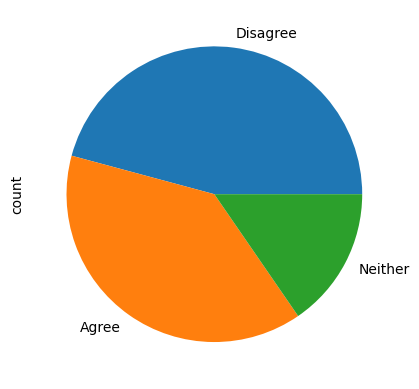

In [6]:
dfQuerry=dfWVSFilterd[(dfWVSFilterd.country=='Germany')&(dfWVSFilterd.wave=="WVS4")]
dfWVSFilterd['job right'].value_counts().plot(kind='pie')

In [150]:
dfWVSFilterd['country'].unique()

['China', 'Germany', 'Nigeria', 'Peru', 'Turkey']
Categories (108, object): ['Albania', 'Algeria', 'Andorra', 'Argentina', ..., 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']

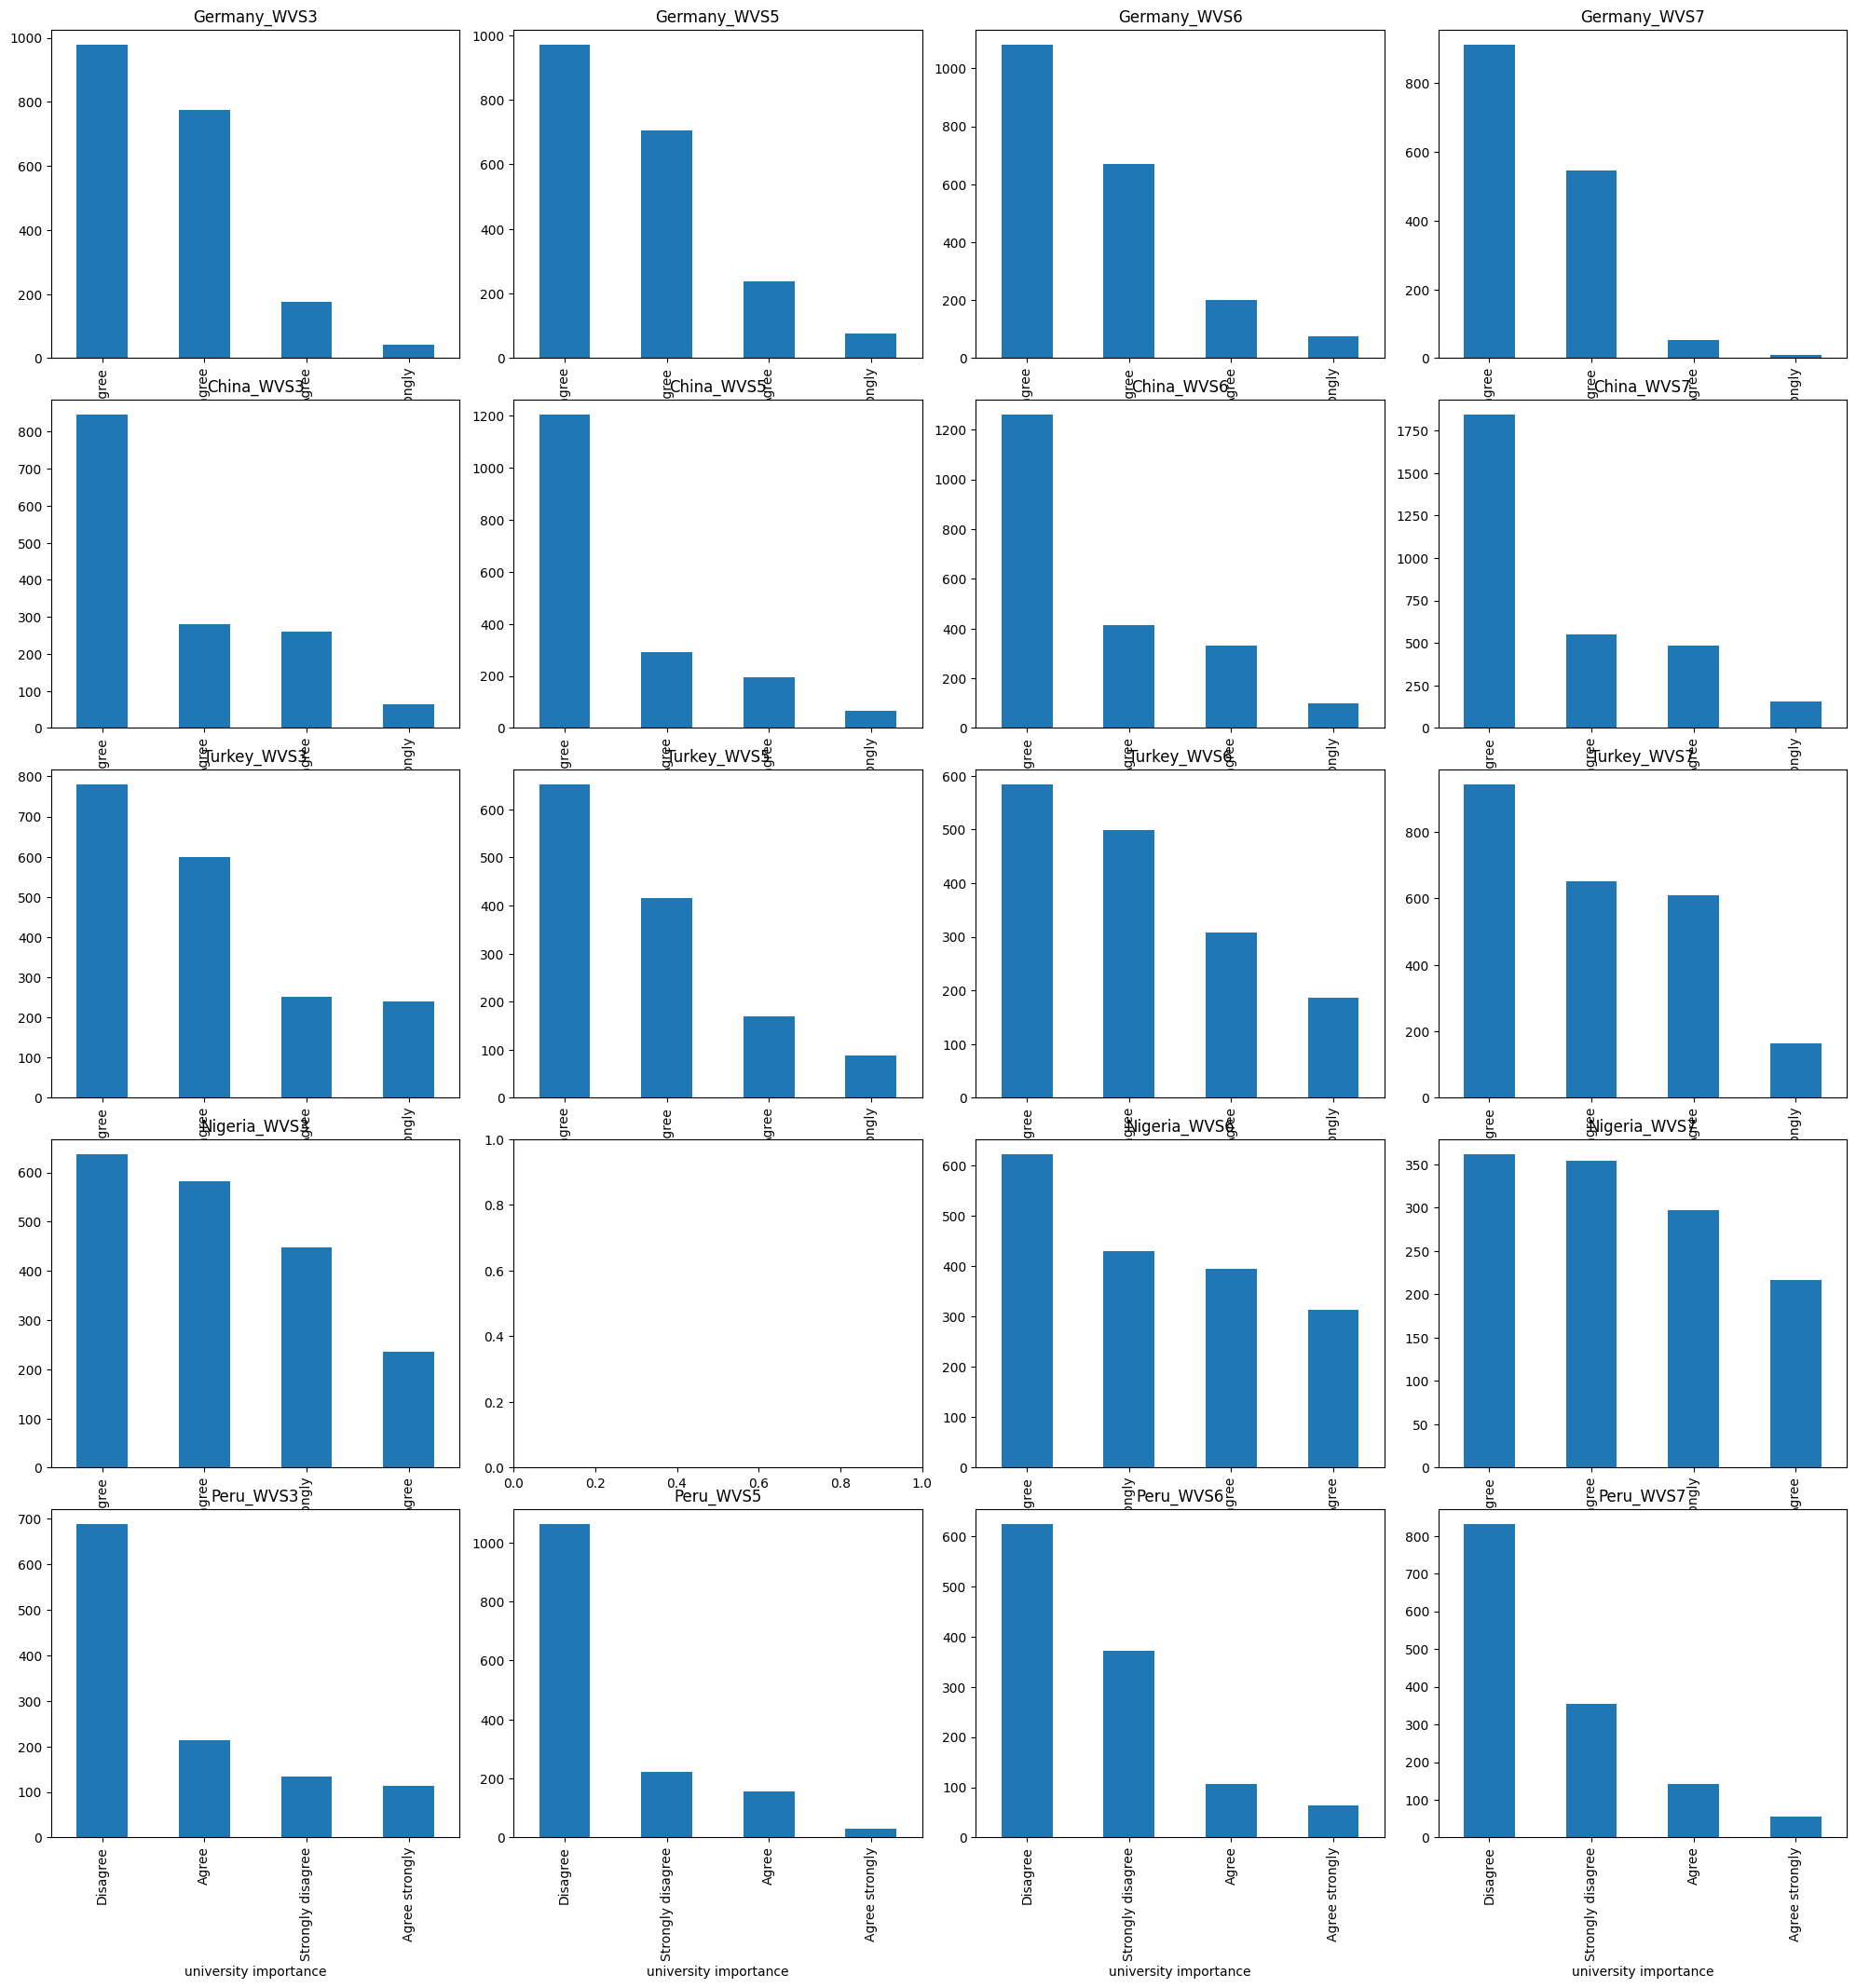

In [9]:
fig, axs = plt.subplots(len(listCountries),len(listWaves),figsize=(20, 20))
plt.tight_layout()

for idxCountry, country in enumerate(listCountries):
    for idxwave, wave in enumerate(listWaves):
        if wave=="WVS5" and country=="Nigeria":
            continue
        dfTemp = dfWVSFilterd[(dfWVSFilterd.country==country)&(dfWVSFilterd.wave==wave)]
        dfTemp['university importance'].value_counts().plot(ax=axs[idxCountry,idxwave], title=country+"_"+wave, kind='bar')

In [ ]:
#definitions
def categoriesToInteger():
#mean, std
def plotOneMean():
#distribution
def plotOneDistribution():

In [ ]:
#examples

In [ ]:
#definitions
#one country, all waves, one question
#trajectories
#multiple distributions

In [ ]:
#examples

In [1]:
#definitions
#all countrys, one wave, one question

In [ ]:
#examples

In [ ]:
#WGV-Score?